In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1491


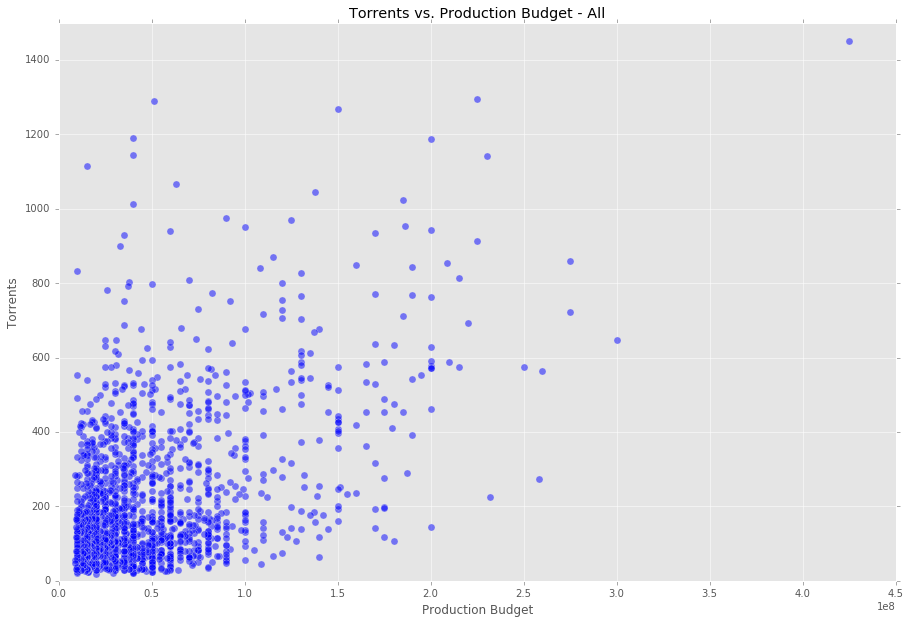

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [7]:
# unique list of grouped directors
unq_directors = df['Director'].unique()
unq_directors = unq_directors.tolist()

# unique list of individual directors
ind_director = set()

for lst in unq_directors:
    for director in lst.split(','):
        ind_director.add(director.strip())
ind_director = sorted(ind_director)

print(len(ind_actor))
#print(ind_actor)

817


In [21]:
# dictionary - count of director occurences
count = defaultdict(lambda:0)

for director in ind_director:
    count[director] = df.Director.str.contains(director).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)
#print(count)

srt_five = [(director, ct) for director, ct in srt if ct > 5]
print(srt_ten)
#print(len(srt_ten))

[('Steven Spielberg', 16), ('Ridley Scott', 13), ('Robert Zemeckis', 10), ('Tony Scott', 10), ('McG', 10), ('Richard Donner', 9), ('Tim Burton', 9), ('Steven Soderbergh', 9), ('Robert Rodriguez', 8), ('Oliver Stone', 8), ('Chris Columbus', 8), ('Joel Schumacher', 8), ('Brett Ratner', 8), ('Peter Farrelly', 7), ('Shawn Levy', 7), ('John McTiernan', 7), ('Antoine Fuqua', 7), ('Martin Scorsese', 7), ('David Fincher', 7), ('Clint Eastwood', 7), ('Adam Shankman', 6), ('Phillip Noyce', 6), ('Frank Coraci', 6), ('F. Gary Gray', 6), ('Jaume Collet-Serra', 6), ('Ron Howard', 6), ('Martin Campbell', 6), ('Wes Craven', 6), ('Barry Levinson', 6), ('Garry Marshall', 6), ('Brian De Palma', 6), ('M. Night Shyamalan', 6), ('Bobby Farrelly', 6), ('Paul W.S. Anderson', 6), ('Ethan Coen', 6), ('Ivan Reitman', 6), ('Joel Coen', 6)]


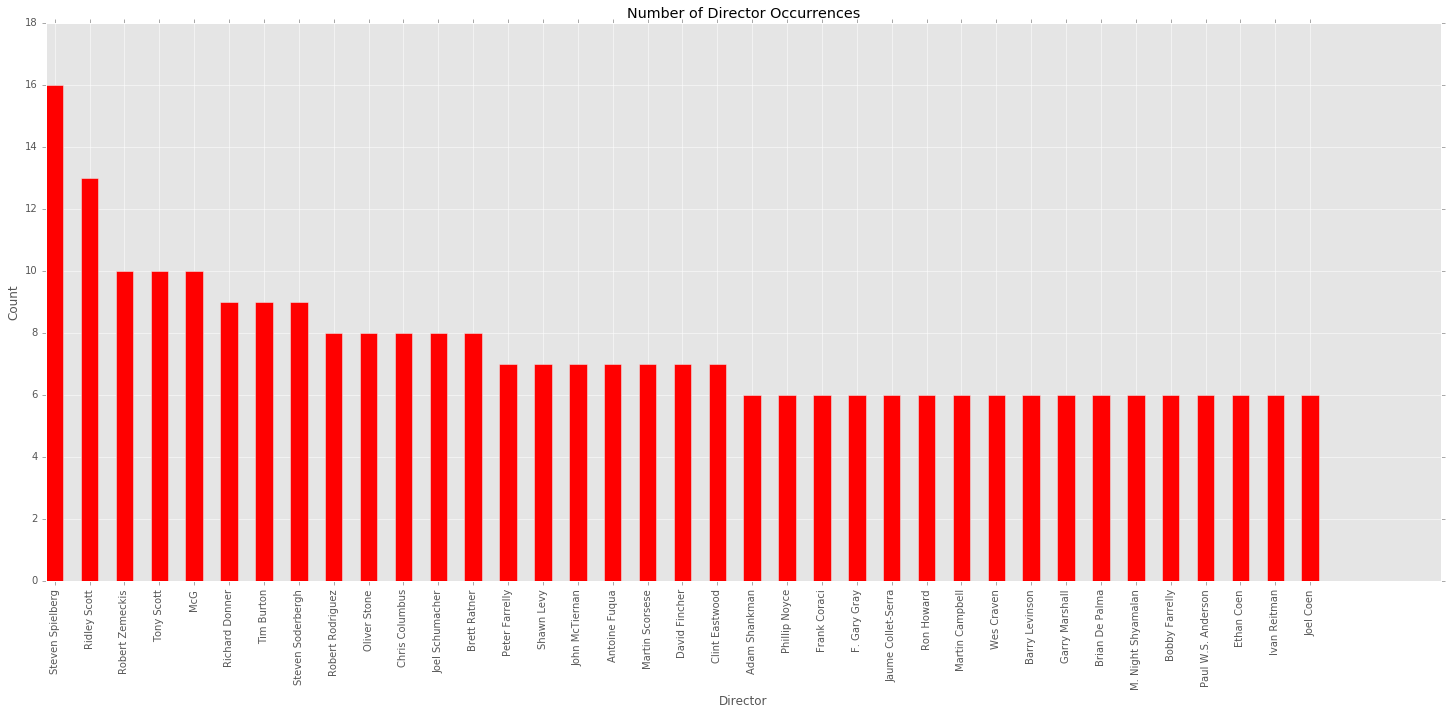

In [16]:
plt.figure(figsize=(25,10))

ind = np.arange(len(srt_five)) # the x locations for the groups
width = 0.5 # the width of the bars

bar_director = [director for director, count in srt_five]
bar_count = [count for director, count in srt_five]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Director')
plt.title('Number of Director Occurrences')
plt.xticks(ind + width/2.0, (bar_director), rotation='vertical')
plt.yticks(np.arange(0, 19, 2))
plt.show()

In [20]:
# return tuple of (string, list)
tup_lst = []
for director_gp in unq_directors:
    temp = []
    for director in director_gp.split():
        temp.append(director)
    tup_lst.append((director_gp, temp))

In [24]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
print(srch_lst('Steven Spielberg', tup_lst))
print(srch_lst('Brad Lewis', tup_lst))

['Steven Spielberg']
['John Lasseter, Brad Lewis']


16


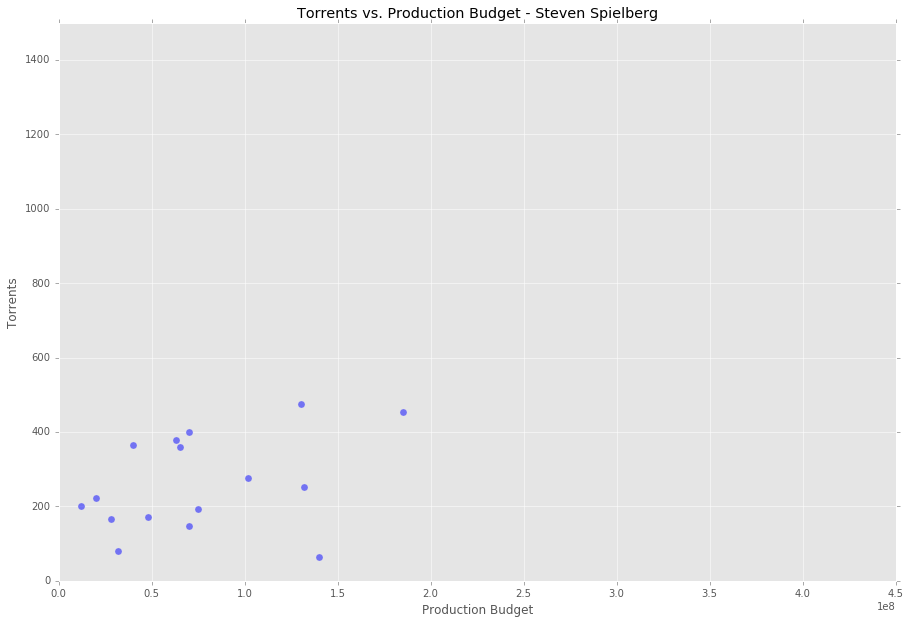

In [25]:
term = 'Steven Spielberg'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

13


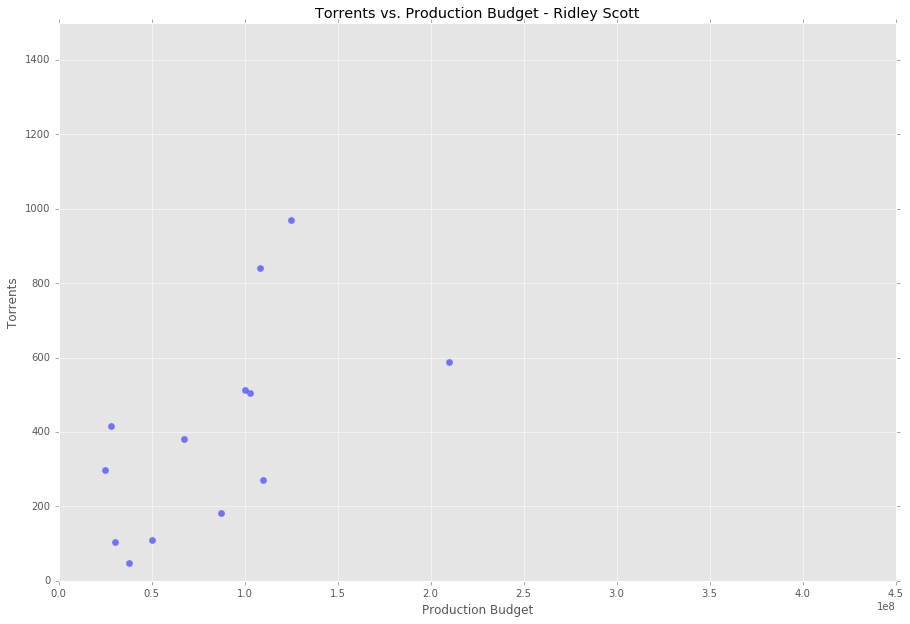

In [26]:
term = 'Ridley Scott'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

0


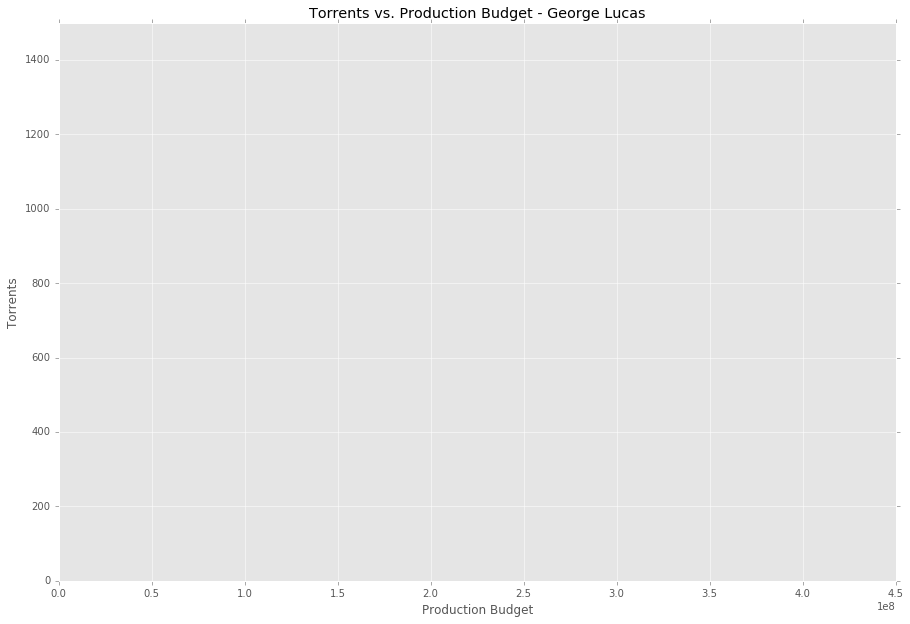

In [27]:
term = 'George Lucas'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

5


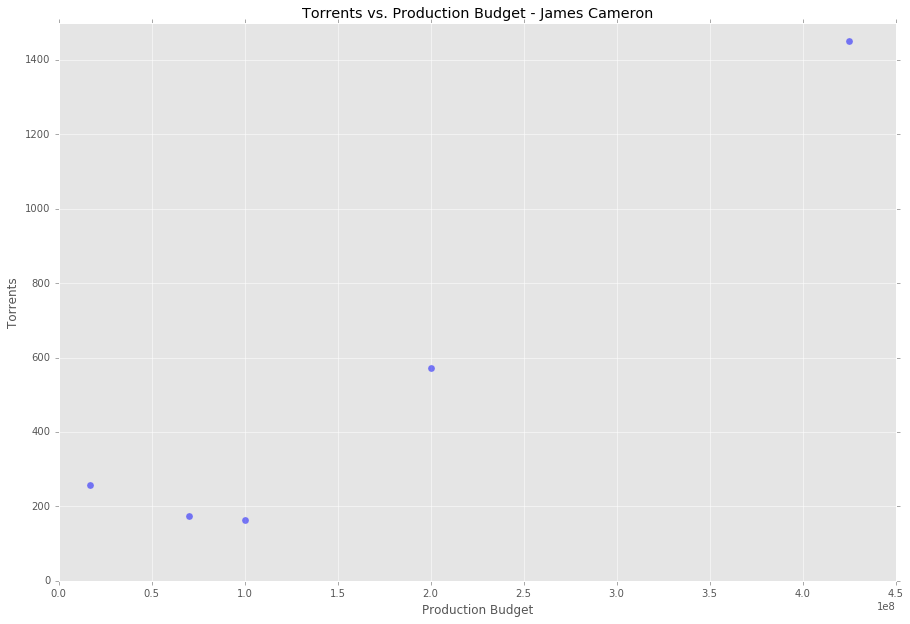

In [28]:
term = 'James Cameron'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

5


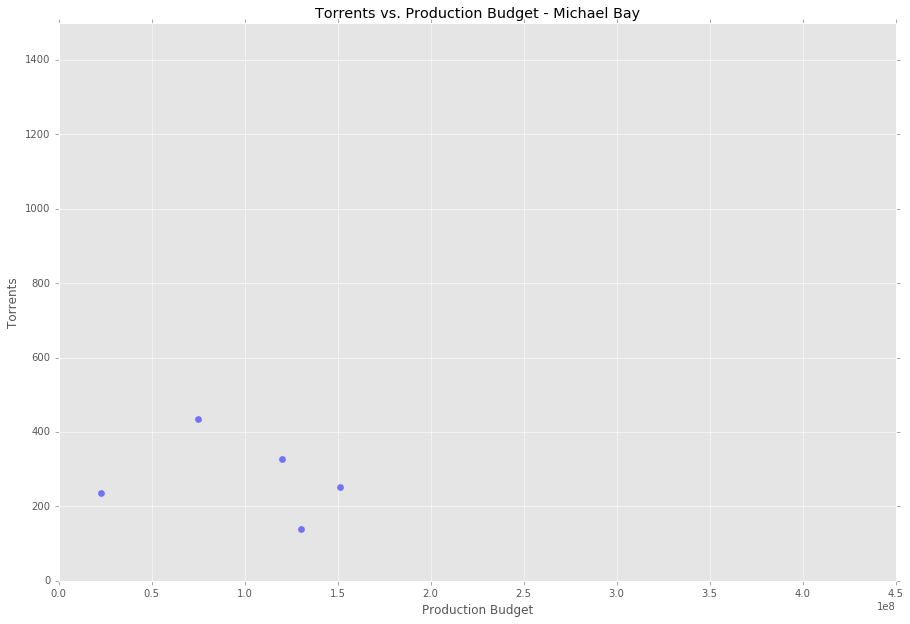

In [37]:
term = 'Michael Bay'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [30]:
df['Director'].value_counts()

Steven Spielberg                  16
Ridley Scott                      13
Tony Scott                        10
Robert Zemeckis                   10
Steven Soderbergh                  9
Tim Burton                         9
Richard Donner                     9
Oliver Stone                       8
Joel Schumacher                    8
Chris Columbus                     8
David Fincher                      7
Shawn Levy                         7
Martin Scorsese                    7
Brett Ratner                       7
Antoine Fuqua                      7
Clint Eastwood                     7
Adam Shankman                      6
Ivan Reitman                       6
Brian De Palma                     6
Barry Levinson                     6
Martin Campbell                    6
Bobby Farrelly, Peter Farrelly     6
Wes Craven                         6
Garry Marshall                     6
Jaume Collet-Serra                 6
Ron Howard                         6
Frank Coraci                       6
J